In [8]:
import pandas as pd

In [10]:
dataset=pd.read_csv("Tatacoffee13_21.csv")

In [12]:
dataset.head(3)

,Date,Open,High,Low,Close
0,2013-01-01,1410.60,1427.9,1408.30,1415.1
1,2013-01-02,1421.00,1626.6,1416.15,1607.4
2,2013-01-03,1632.55,1673.9,1613.05,1626.2


In [17]:
dataset.index=pd.to_datetime(dataset['Date'])

In [23]:
dataset.head(3)

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.9,1408.30,1415.1
2013-01-02,1421.00,1626.6,1416.15,1607.4
2013-01-03,1632.55,1673.9,1613.05,1626.2


In [22]:
dataset.drop('Date',axis=1,inplace=True)

In [26]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

data=dataset['High']
exog=dataset[['Open','Low','Close']]



In [27]:
data.shape

(2225,)

In [36]:
data.values.reshape(-1,1).flatten()

array([1427.9 , 1626.6 , 1673.9 , ...,  203.9 ,  222.  ,  220.45])

In [28]:
exog.shape

(2225, 3)

In [39]:
sc_d.fit_transform(data.values.reshape(-1,1)).flatten()

array([ 2.47653118,  2.93140654,  3.0396884 , ..., -0.32551938,
       -0.28408383, -0.28763218])

In [40]:
sc_d=StandardScaler()
sc_e=StandardScaler()
sc_data=sc_d.fit_transform(data.values.reshape(-1,1)).flatten()
sc_exog=sc_e.fit_transform(exog)

In [41]:
#Initialize variable for storing the best_score
best_r2_score=-np.inf
best_trend_r2 = None
best_orders_r2 = None

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
# Parameters for SARIMAX model
orders = [(1, 1, 1), (2, 1, 2), (1, 0, 1)]
trends = ['n', 'c', 't', 'ct']
for od in orders:
    for td in trends:
        model=SARIMAX(sc_data,order=od,trends=td,season_order=(0,0,1,12),exog=sc_exog)
        model_fit=model.fit(disp=False)
        y_pred=model_fit.predict(0,len(sc_data)-1,exog=sc_exog)
        r2 = r2_score(sc_data, y_pred)

        if r2>best_r2_score:
            best_r2_score = r2
            best_trend_r2 = td
            best_orders_r2 = od
print(f'Best_r2_score: {best_r2_score}')
print(f'best_trend: {best_trend_r2}')
print(f'best_orders: {best_orders_r2}')


Best_r2_score: 0.9998789415336244
best_trend: n
best_orders: (1, 0, 1)


In [49]:
sc_exog.shape[1]

3

In [51]:
forecast_steps = 10

#Creating future exogeneous values
forecast_exog=np.zeros((forecast_steps,sc_exog.shape[1]))
forecast_exog

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [63]:
model=SARIMAX(sc_data,order=od,trends=td,season_order=(0,0,1,12),exog=sc_exog)
model_fit=model.fit(disp=False)
forecast_steps=10
forecast=model_fit.forecast(forecast_steps,exog=forecast_exog)

In [64]:
forecast.shape

(10,)

In [65]:
forecast_price=sc_d.inverse_transform(forecast.reshape(-1,1))

In [66]:
forecast_price

array([[346.08150449],
       [346.08702933],
       [346.09017554],
       [346.09196722],
       [346.09298752],
       [346.09356855],
       [346.09389942],
       [346.09408785],
       [346.09419515],
       [346.09425625]])

In [61]:
sc_data.shape

(2225,)

In [69]:
actual_value=sc_d.inverse_transform(sc_data.reshape(-1,1))
actual_value

array([[1427.9 ],
       [1626.6 ],
       [1673.9 ],
       ...,
       [ 203.9 ],
       [ 222.  ],
       [ 220.45]])

In [72]:
predicted_value=sc_d.inverse_transform(y_pred.reshape(-1,1))
predicted_value.shape

(2225, 1)

In [73]:
import numpy as np
forecast_plot=np.arange(len(sc_data),len(sc_data)+forecast_steps,1)

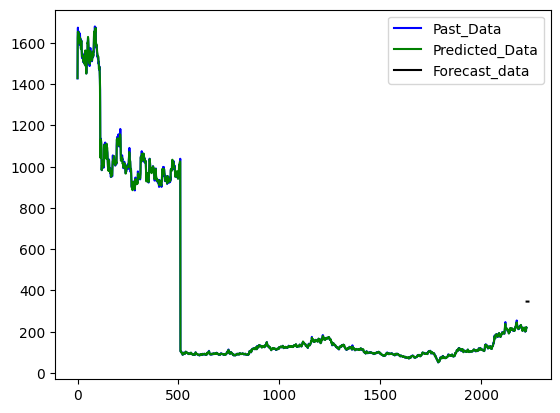

In [79]:
#Forecasting value for High price for next 10 value has predicted

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

plt.plot(actual_value,label='Past_Data',color='blue')
plt.plot(predicted_value,label='Predicted_Data',color='green')
plt.plot(forecast_plot,forecast_price,label='Forecast_data',color='black')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend(loc='best')
plt.show()